# DDA3020 Homework1 Problem1

* Huang Xiangyi ——122020066@link.cuhk.edu.cn


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Step1: Load datasets and check data information

In [69]:
#Lode data
data = pd.read_csv('/Users/sharry/Downloads/house_prices.csv')

In [70]:
# Convert data type 
data['Neighborhood'] = data['Neighborhood'].astype('category')

In [71]:
# Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB


In [72]:
data.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


## Step2: Data visualization with seaborn

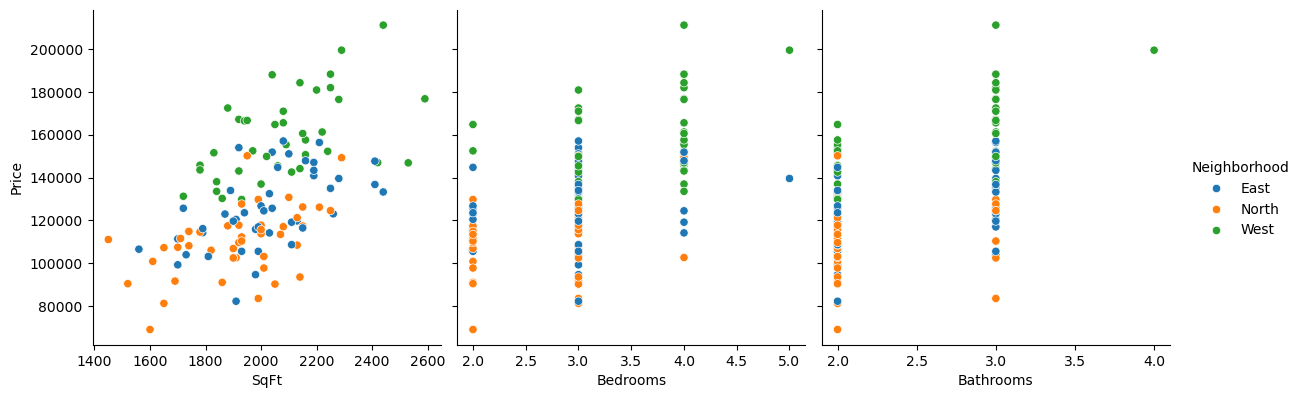

In [73]:
# Use seaborn.pairplot to visualize "Price" against numeric attributes with colored points based on "Neighborhood"
sns.pairplot(data, x_vars=["SqFt", "Bedrooms", "Bathrooms"], y_vars="Price", hue="Neighborhood", height=4)

In [74]:
data.Neighborhood.value_counts()

Neighborhood
East     45
North    44
West     39
Name: count, dtype: int64

In [75]:
# Dealing with Category Varianles and get the dummy variables
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy = data_dummy.astype(int)
data_dummy.head()

,SqFt,Bedrooms,Bathrooms,Price,Neighborhood_North,Neighborhood_West
0,1790,2,2,114300,0,0
1,2030,4,2,114200,0,0
2,1740,3,2,114800,0,0
3,1980,3,2,94700,0,0
4,2130,3,3,119800,0,0


Text(0.5, 1.0, 'Heatmap of covariance matrix')

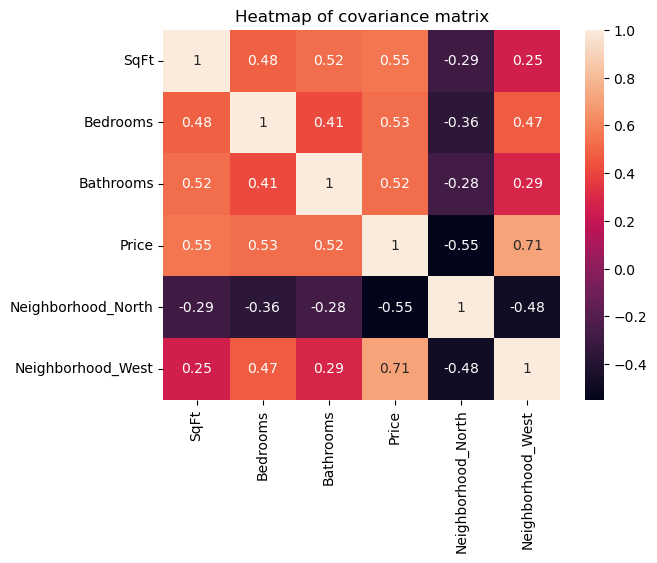

In [76]:
# Use seaborn.heatmap to plot pairwise correlation
sns.heatmap(data_dummy.corr(), annot=True)
plt.title("Heatmap of covariance matrix")

## Step3: Use sklearn library to process the category variavle.

In [77]:
#One-hot-encoder converts category variable column into one-hot matrix
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
#Seperate the predictors and target
X = data_dummy.drop("Price", axis=1)
y = data_dummy["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step4: Train and evaluate a linear regression model

In [78]:
# Train and predict with linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [79]:
# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_pred_train, y_train)
MSE_test = mean_squared_error(y_pred_test, y_test)
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 14067.463277743977
RMSE_test: 16099.65929481163


# DDA3020 Homework1 Problem2

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step1: Conduct the trainning of linear regression model

In [81]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load diabetes dataset
dataset = load_diabetes(as_frame=True)
data = dataset['frame']
X = data[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].to_numpy()
y = data['target'].to_numpy()
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, w, learning_rate, iterations):
    m = len(X)
    cost_history = []

    for i in range(iterations):
        # Predicted values
        y_pred = X @ w
        # Gradient calculation
        gradient = 1/m * X.T @ (y_pred - y)
        # Update weights using gradient descent
        w = w - learning_rate * gradient
        
        # Compute mean squared error (cost)
        cost = mean_squared_error(y_pred, y)
        cost_history.append(cost)

    return w, cost_history
    
# Initializations
w_initial = np.zeros(X_bias.shape[1])
learning_rate = 0.01
iterations = 1000


## Step2: Train a linear regression model and make prediction

Training RMSE: 75.5149134242802
Testing RMSE: 70.78385118285611


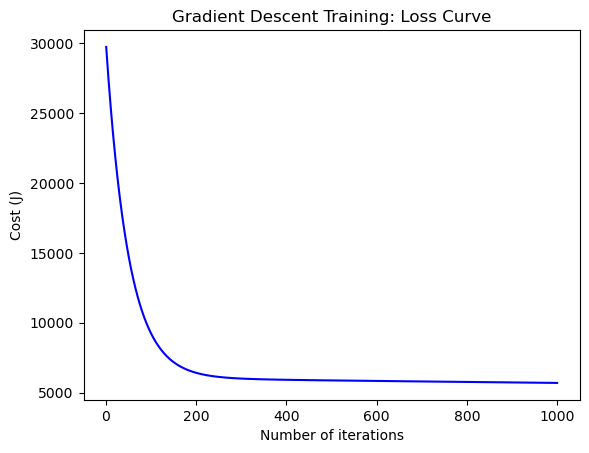

In [82]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Train the model on the training set
w_trained, cost_history = gradient_descent(X_train, y_train, w_initial, learning_rate, iterations)

# Make predictions on training and testing sets
y_train_pred = X_train@ w_trained
y_test_pred = X_test@ w_trained

# Calculate RMSE for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
rmse_test = np.sqrt(mean_squared_error(y_test_pred, y_test))

print(f"Training RMSE: {rmse_train}")
print(f"Testing RMSE: {rmse_test}")

# Plot the loss curve
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent Training: Loss Curve')
plt.show()

## Step3: Repeat the procedure

In [83]:
num_trials = 10

for trial in range(num_trials):
    # Adjust parameters as needed
    learning_rate_trial = 0.1
    iterations_trial = 1000
    
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=trial)

    # Train the model on the training set
    theta_trained, _ = gradient_descent(X_train, y_train, theta_initial, learning_rate_trial, iterations_trial)

    # Make predictions on training and testing sets
    y_train_pred = X_train.dot(theta_trained)
    y_test_pred = X_test.dot(theta_trained)

    # Calculate RMSE for training and testing sets
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Trial {trial + 1} - Training RMSE: {rmse_train}, Testing RMSE: {rmse_test}")

Trial 1 - Training RMSE: 62.590660939996056, Testing RMSE: 60.580770667705025
Trial 2 - Training RMSE: 62.783390995537424, Testing RMSE: 60.66205941746652
Trial 3 - Training RMSE: 62.926301039450145, Testing RMSE: 61.31409646585419
Trial 4 - Training RMSE: 62.36345431336485, Testing RMSE: 62.50166538351438
Trial 5 - Training RMSE: 62.96396624624871, Testing RMSE: 60.776421409441205
Trial 6 - Training RMSE: 62.410023000380754, Testing RMSE: 64.76109889516357
Trial 7 - Training RMSE: 63.392624640165565, Testing RMSE: 60.325994075801816
Trial 8 - Training RMSE: 63.45642680838928, Testing RMSE: 58.3417861304229
Trial 9 - Training RMSE: 63.29935956278299, Testing RMSE: 60.9717531984771
Trial 10 - Training RMSE: 64.2167603473858, Testing RMSE: 57.81089246569676
